# Метод Монте-Карло в физике

Методами Монте-Карло называют множество различных методов в совершенно разных областях от физики до экономики. Основная суть этих методов заключается в использовании случайных величин для получения различных состояний исследуемой системы. 

Одно из частых применений метода Монте-Карло в физике состоит в расчете интегралов. При этом действительно полезным и незаменимым метод становится при работе с большим количеством измерений, когда построение обычных квадратур приводит к чересчур  огромным сеткам. Например, уже в случае 10 измерений, задание обычной равномерной решетки шириной в $2^4 = 16$ узлов, приводит к общей сетке размера $2^{40} \simeq 10^{12}$. Массив данных float такого размера будет занимать 4ТБ в памяти компьютера. Оперировать такими интегралами стандартными методами становится принципиально невозможно.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
plt.style.use('ggplot')
%matplotlib notebook

## Задание 1
Вычислим объем многомерной сферы в большом количестве измерений.

### Задание 1.1 
Напишите функцию, вычисляющую точный объем $d$-мерной сферы с помощью явного выражения. 
Объем многомерной сферы радиуса $R$ в $d$-измерениях дается формулой: 
$$
V_d = \frac{\pi^{d/2}} {\Gamma(1 + d/2)}
$$
где $\Gamma(x)$ - гамма функция, значение которой можно получить из scipy.special.

In [15]:
def getSphereVolumeExact(D, R):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R по явной формуле

    --------
    Аргументы:
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    V = np.pi**(D / 2) / sp.gamma(1 + D / 2) * R**D
    return V

1. Проверьте результат для нескольких известных вам значений. 
2. Построите график V(D)

ошибка для n = 2 - 0.0
ошибка для n = 3 - -8.881784197001252e-16


Text(0, 0.5, 'Объем гипершара единичного радиуса')

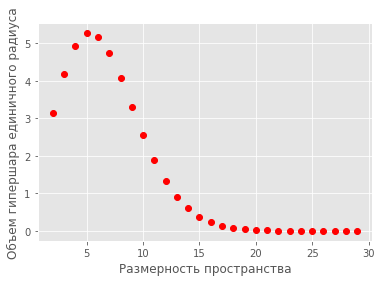

In [4]:
#проверка для хорошо известных значений n = 2, n = 3
print("ошибка для n = 2 -", np.pi - getSphereVolumeExact(2, R = 1))
print("ошибка для n = 3 -", 4 * np.pi / 3 - getSphereVolumeExact(3, R = 1))


#построение графика
D = np.arange(2, 30)
V = [getSphereVolumeExact(i, R = 1) for i in D]

fig, ax = plt.subplots()
ax.plot(D, V, 'ro')
ax.set_xlabel('Размерность пространства')
ax.set_ylabel('Объем гипершара единичного радиуса')

Заметим, что объем гипершара стремится к нулю при $d \to \infty$. 

### Задание 1.2
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на псевдослучайных числах (используя, например `numpy.random.rand`).

In [56]:
def getSphereVolumePseudorandom(N, D, R = 1):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R методом Монте-Кало на псевдослучайных числах

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
#Сгенерируем равномерную случайную матрицу размером N х d , каждый элемент которой принадлежит [-R, R). 
#Строка такой матрицы - случайная точка в D-мерном кубе со стороной 2R. Единичная сфера целиком умещается в такой куб.
    x = np.random.uniform(-R, R, (N, D))
    
    counter = 0
    
    #пройдемся по всем строкам, т.е. выбранным точкам, и посчитаем, сколько из них лежит внутри сферы
    for i in range(N):
        norm = 0
        
        for j in range(D):
            norm += (x[i][j])**2
        
        if np.sqrt(norm) <= R:
            counter += 1
    
    V = counter / N * (2*R)**D #умножение на (2*R)**D из-за объема куба, в который мы вписали сферу
    #print(D, '-', V)
    return V

print("Площадь единичного двумерного круга при миллионе точек -", getSphereVolumePseudorandom(N = 100000, D = 2, R = 1))

2 - 3.13848
Площадь единичного двумерного круга при миллионе точек - 3.13848


Постройте график зависимости относительной точности $\epsilon$ которая достигается при фиксированном $N$ от размерности сферы $D$. Для относительной точности используйте выражение $\epsilon = (V_{exact} - V_{random})/V_{exact}$.

2 - 3.1452
3 - 4.2192
4 - 4.9936
5 - 5.5648
6 - 5.12
7 - 4.6208
8 - 4.1216
9 - 3.7376
10 - 2.3552
11 - 1.4336
12 - 3.2768
13 - 0.8192
14 - 1.6384
15 - 0.0
16 - 0.0
17 - 0.0
18 - 0.0
19 - 0.0


Text(0, 0.5, '$\\epsilon$')

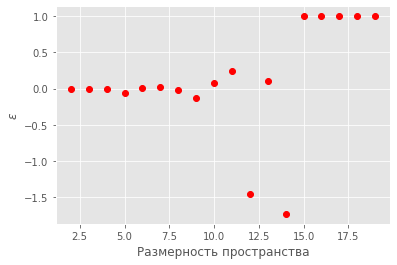

In [57]:
# Write your code and answer here

#зафиксируем N = 10**4
x = np.arange(2, 20)
eps = [1 - getSphereVolumePseudorandom(10000, int(i), 1) / getSphereVolumeExact(i, 1) for i in x]

fig1, ax1 = plt.subplots()
ax1.plot(x, eps, 'ro')
ax1.set_xlabel("Размерность пространства")
ax1.set_ylabel("$\epsilon$")


Сначала ошибка очень мала, затем начинает заметно осциллировать и становится равной 1 при d ~ 14 (т.е. алгоритм на псведо-случайных числах начал выдавать машинный ноль в качестве искомого объема при данном количестве точек). 

### Задание 1.3
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на квазислучайной последовательности Соболя.

Для установки библиотеки `sobol_seq`:


выполните `pip install sobol_seq` в Jupyter или

выполните команду `pip install sobol_seq --user` в командном окне (если вы используете Jupyter Notebook в составе Anaconda откройте Anaconda Prompt и выполните команду pip в ней, после чего перезапустите Jupyter Notebook).


In [2]:
!pip install sobol_seq
import sobol_seq

Используйте функцию `i4_sobol_generate`. Документацию по ней можно получить выполнив следующую строчку кода:

In [31]:
sobol_seq.i4_sobol_generate?

In [62]:
def getSphereVolumeQuasirandom(N, D, R = 1):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R методом Монте-Кало на квазислучайных числах

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    #отмасштабируем числа, выдаваемые последовательностью Соболя
    x = sobol_seq.i4_sobol_generate(D, N)
    x = 2 * R * x
    x = x - R * np.ones((N, D))
    
    counter = 0
    
    #пройдемся по всем столбцам, т.е. выбранным точкам, и посчитаем, сколько из них лежит внутри сферы
    for i in range(N):
        norm = 0.0
        
        for j in range(D):
            norm += (x[i][j])**2
        
        if np.sqrt(norm) <= R:
            counter += 1
    
    V = counter / N * (2*R)**D #умножение на (2*R)**D из-за объема куба, в который мы вписали сферу
    
    return V


0.0001 2.461136950494199e-08


Сравните точность вычисления объема для квазислучайной и псевдослучайной последовательностей, рассчитав  $\epsilon(D)$, при таком же значении $N$, как в предыдущем задании. Постройте обе зависимости $\epsilon(D)$ на одном графике в логарифмической шкале по $\epsilon$.

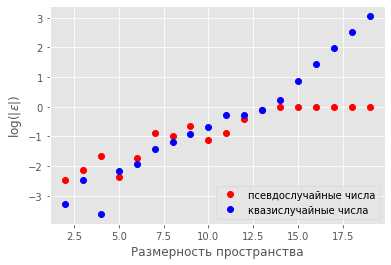

In [48]:
# Write your code and answer here

#зафиксируем N = 10**4
x = np.arange(2, 20)
eps1 = [np.log10(abs(1 - getSphereVolumePseudorandom(10000, i, 0.5) / getSphereVolumeExact(i, 0.5))) for i in x]
eps2 = [np.log10(abs(1 - getSphereVolumeQuasirandom(10000, i, 0.5) / getSphereVolumeExact(i, 0.5))) for i in x]

#ЕСЛИ РАСКОММЕНТИТЬ ЭТИ ДВЕ СТРОКИ И ЗАКОММЕНТИТЬ ДВЕ ВЕРХНИЕ СТРОКИ, ТО МОЖНО УВИДЕТЬ, ЧТО SCIPY НЕ СЧИТАЕТ 
#ГАММА-ФУНКЦИЮ ТАК ТОЧНО, КАК МЫ ПРОСИМ, И ОТ ЭТОГО ПРИ d > 14 ПОЛУЧАЕТСЯ АБСУРД

#eps1 = [np.log10(abs(getSphereVolumePseudorandom(10000, i, 0.5) / getSphereVolumeExact(i, 0.5))) for i in x]
#eps2 = [np.log10(abs(getSphereVolumeQuasirandom(10000, i, 0.5) / getSphereVolumeExact(i, 0.5))) for i in x]

fig2, ax2 = plt.subplots()
ax2.plot(x, eps1, 'ro', label = 'псевдослучайные числа')
ax2.plot(x, eps2, 'bo', label = 'квазислучайные числа')
ax2.set_xlabel("Размерность пространства")
ax2.set_ylabel("$\log(|\epsilon|)$")
ax2.legend(loc = 'lower right')



Сделайте вывды о работе псевдослучайной и квазислучайной последовательностях. 

Поначалу точность не сильно отличается в обоих алгоритмах. При d ~ 14 алгоритм на псевдослучайных числах начинает выдавать нулевой объем, соответственно получается $\epsilon = 1$ и $\log(\epsilon) = 0$. А для алгоритма на квазислучайных числах просто не хватает точности, он не успевает за уменьшением точного объема и получается, что $V_{quasi} / V_{exact} >> 1 => \log(|1 - V_{quasi} / V_{exact}|) > 0$

## Задание 2

Рассмотрим решетку $n\times n$, в которой каждой ячейке соответствует спин $\sigma_i$ равный $+1$ или $-1$. При этом между соседними ячейками существует энергия взаимодействия
$$
E_i = -J \sigma_i \sigma_j
$$
Тогда энергия каждой ячейки 
$$
E_i = -J \sigma_i \sum_j \sigma_j
$$
где суммирование подразумевается только по соседним с $i$-ой ячейкой.

При нулевой температуре энергитически более выгодным состоянием является состояние, когда все спины одинаково ориентированы. Однако при ненулевой температуре вероятность перехода в более возбужденное состояние пропорциональна $\sim \exp(-\Delta E/ k T)$.

Явное численное моделирование такой системы (модели Изинга) является проблематичным, поскольку количество возможных состояний системы $2^N$, где $N$ - общее число узлов, и уже для двумерной сетки $16\times 16$ это число становится астрономически большим. 

На помощь приходят методы Монте-Карло. Одна из простейших его реализаций (алгоритм Метрополиса — Гастингса):
1. Задаем случайное начальное состояние
2. Выбираем случайную ячейку
3. Переворачиваем её спин и считаем изменение энергии $\delta E$ данной ячейки.
4. Если изменение энергии отрицательное, оставляем спин перевернутым
5. Если изменение энергии положительное, оставляем спин перевернутым с вероятностью $\exp(-\delta E/kT)$
6. Повторяем пункты 2-5 нужное количество раз

Спустя достаточно большое количество повторений устанавливается равновесное состояние. 

Реализуем данный алгоритм: 
1. Задайте начальное случайное расраспределение в виде матрицы из $+1$ и $-1$ размерности $N\times N$:

In [4]:
def getInitialState(N):
    '''
    Функция задает случайное начальное состояние
    ---------
    Аргументы:
    N - int, линейный размер решетки 
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    '''
    state = np.zeros((N,N))
    #будем использовать биномиальное распределение
    
    for i in range(N):
        for j in range(N):
            if np.random.binomial(1, 0.5) == 0:
                state[i][j] = -1
            else:
                state[i][j] = 1
            
    return state

print(getInitialState(10))

[[ 1.  1.  1.  1. -1.  1. -1.  1. -1. -1.]
 [ 1.  1.  1. -1. -1.  1. -1. -1. -1. -1.]
 [-1.  1. -1. -1.  1.  1.  1. -1. -1.  1.]
 [ 1.  1. -1. -1. -1. -1.  1.  1. -1.  1.]
 [ 1.  1.  1. -1.  1. -1. -1.  1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.  1.  1. -1.]
 [ 1. -1.  1. -1. -1. -1. -1.  1. -1.  1.]
 [-1. -1. -1. -1.  1. -1. -1.  1. -1. -1.]
 [ 1. -1. -1. -1.  1.  1.  1.  1.  1.  1.]
 [-1.  1. -1.  1.  1. -1.  1. -1.  1.  1.]]


2. Напишите функцию, которая для ячейки $(i,j)$ расчитывает изменение её энергии, если изменить её знак. При этом для простоты предполагаем, во-первых, что $J=1$ (на него отнормируем kT), и во-вторых, что элементы находящиеся на верхней и нижней (левой и правой) границах находятся рядом друг с другом (топология тора).  


In [38]:
def getDeltaE(i, j, state):
    '''
    Функция расчитывает и возвращает изменение энергии ячейки (i,j) в случае ее переворота (не меняя состояния state)
    
    ---------
    Аргументы:
    i - int, адресс ячейки вдоль оси 0
    j - int, адресс ячейки вдоль оси 1
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    dE - float, изменение энергии
    '''
    #запомним ячейку
    s = state[i][j]
    
    #левый сосед
    l = state[i][j - 1]
    
    #правый сосед
    if j == state.shape[1] - 1:
        r = state[i][0]
    else:
        r = state[i][j + 1]
    
    #верхний сосед
    u = state[i - 1][j]
     
    #нижний сосед
    if i == state.shape[0] - 1:
        d = state[0][j]
    else:
        d = state[i + 1][j]
    
    dE = 2 * s * (l + r + u + d)
    
    return dE

state = getInitialState(10)
print(state, getDeltaE(0, 0, state))

[[ 1. -1.  1.  1.  1.  1.  1.  1.  1. -1.]
 [ 1. -1. -1.  1.  1.  1.  1.  1.  1. -1.]
 [-1. -1. -1. -1.  1.  1. -1.  1. -1. -1.]
 [ 1.  1.  1. -1. -1.  1. -1. -1. -1.  1.]
 [ 1. -1.  1. -1. -1. -1.  1.  1.  1. -1.]
 [ 1. -1. -1. -1.  1. -1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1. -1.  1.  1.  1.  1. -1.]
 [ 1.  1. -1. -1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1. -1. -1. -1.  1.  1.  1.]
 [ 1. -1. -1. -1.  1. -1.  1.  1. -1. -1.]] 0.0


3. Напишите функцию, которая $N^2$ раз для разных случайных $(i,j)$ меняет спин в зависимости от изменения энергии, согласно пунктам 4. и 5. 

In [36]:
def makeFlip(T, state):
    '''
    Функция N^2 раз переворачивает спин, и принимает решение оставить его перевернутым или нет, согласно правилам 4. и 5.
    
    ---------
    Аргументы:
    T - float, положительное число, безразмерный коэфициент, характеризующий температуру, равный kT/J
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив нового состояния системы размера NxN
    '''
    
    N = state.shape[0]
    
    for k in range(N * N):
        #выбор случайной ячейки
        i = np.random.randint(0, N - 1)
        j = np.random.randint(0, N - 1)
        
        dE = getDeltaE(i, j, state)
        
        if dE <= 0:
            state[i][j] = - state[i][j]
        else:
            if np.random.binomial(1, np.exp(-dE/T)) == 1:
                state[i][j] = - state[i][j]
    
    return state


4. Напишите функцию, которая будет рассчитывать значение энергии всей системы (предполагаем $J=1$).

In [85]:
def getEnergy(state):
    '''
    Функция, рассчитывает значение энергии всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    E - float, значение энергии системы
    '''
    N = state.shape[0]
    
    E = 0
    
    for i in range(N):
        for j in range(N):
            s = state[i][j]
            
            l = state[i][j - 1]
    
            if j == state.shape[1] - 1:
                r = state[i][0]
            else:
                r = state[i][j + 1]
    
            u = state[i - 1][j]
     
            if i == state.shape[0] - 1:
                d = state[0][j]
            else:
                d = state[i + 1][j]
                
            E += -s * (l + r + d + u)
    
    E = E / 2        
    
    return E


5. Напишите функцию, которая будет рассчитывать значение намагниченности всей системы $M=\sum \sigma$

In [86]:
def getMagnetization(state):    
    '''
    Функция, рассчитывает значение намагниченности всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    M - float, значение намагниченности системы
    '''
    N = state.shape[0]
    
    M = 0
    
    for i in range(N):
        for j in range(N):
            M += state[i][j]
    
    return M


В следующей ячейке кода зададим начальные параметры: 

**Nt** - количество точек по температуре, 

**N** - линейный размер решетки, 

**eqStep** - количество попыток переворота спина, в течение которых система приводится к равновесному сосотоянию. Обратите внимание, что это число должно увеличиваться пропорционально размеру всей сетки,

**steps** - количество попыток переворота спина, в течение которых рассчитывается значения энергии и намагниченности (нужно для усреднения расчитанных значений по ансамблю состояний, близких к равновесному)

In [87]:
N       = 20        # размер решетки NxN
Nt      = 100         # количество точек температуры
eqSteps = 300       # количество раз выполнения makeFlip для установления равновесия
steps   = 60        # количество раз выполнения makeFlip для усреднения энергии и намагниченности

T = np.linspace(0.5, 5, Nt); 
E, M = np.zeros(Nt), np.zeros(Nt)

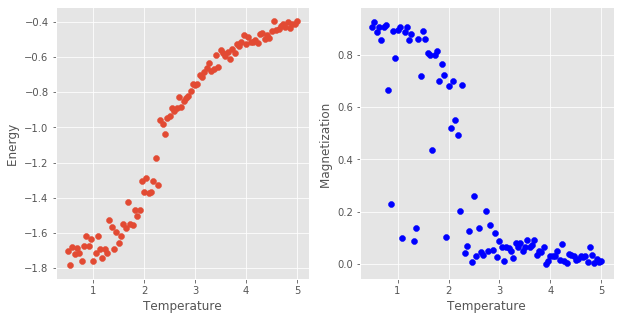

In [88]:
for t in range(Nt):
    print("Complete", t/Nt*100, '%\r', end='')
    
    Esum = Msum = 0
    state = getInitialState(N)
    
    for i in range(eqSteps):         # установление статистического равновесия
        makeFlip(T[t], state)          

    for i in range(steps):           # суммирование по разным состояниям близким к равновеснсому
        makeFlip(T[t], state)          
        Esum += getEnergy(state)       
        Msum += getMagnetization(state) 

    E[t] = Esum / (steps * N * N)
    M[t] = Msum / (steps * N * N)

print("Done              \r", end='')

_, ax = plt.subplots(1,2,figsize=(10, 5));

ax[0].scatter(T, E)
ax[0].set_xlabel("Temperature");
ax[0].set_ylabel("Energy ");

ax[1].scatter(T, abs(M), color = 'blue')
ax[1].set_xlabel("Temperature"); 
ax[1].set_ylabel("Magnetization ");

Интерпретируйте с точки зрения физики полученные графики. Описывают ли они поведение ферромагнетиков и фазовые переходы?

Да, описывают. С увеличением температуры мы видим увеличение тепловой энергии и достаточно резкое уменьшение намагниченности почти до нуля при определенной температуре, т.е. происходит как раз фазовый переход второго рода. 

Задайте новое сосотояние системы с достаточно большим $N$ и визуализируйте его думя цветами (например с помощью `plt.scatter`). Примените несколько раз к этому сосотоянию функциию makeFlip с низкой и с высокой температурами. Объясните наблюдаемое

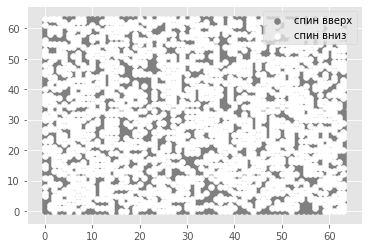

In [45]:
N = 64
state = getInitialState(N)

x01 = []
x02 = []
y01 = []
y02 = []

for i in range(N):
    for j in range(N):
        if state[i][j] == 1:
            x01.append(i)
            y01.append(j)
        else:
            x02.append(i)
            y02.append(j)
            
fig10, ax10 = plt.subplots()
ax10.scatter(x01, y1, c = 'grey', label = 'спин вверх')
ax10.scatter(x2, y2, c = 'white', label = 'спин вниз')
ax10.legend(loc = 'best')


<Figure size 432x288 with 0 Axes>

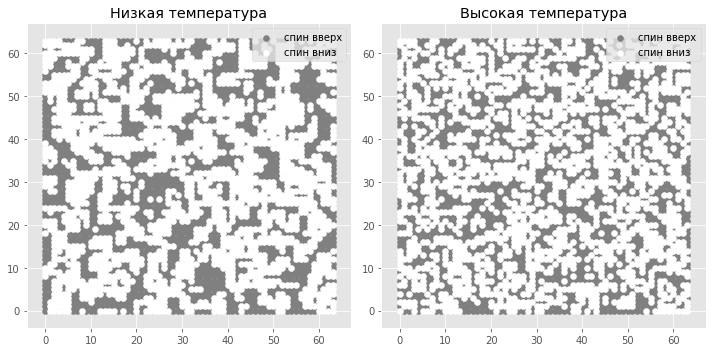

In [59]:
plt.figure()

# Write your code here
state_cold = state.copy()
state_cold = makeFlip(0.01, state_cold)

state_hot = state.copy()
state_hot = makeFlip(10, state_hot)

x1 = []
x2 = []
y1 = []
y2 = []

x3 = []
y3 = []
x4 = []
y4 = []

for i in range(N):
    for j in range(N):
        if state_cold[i][j] == 1:
            x1.append(i)
            y1.append(j)
        else:
            x2.append(i)
            y2.append(j)
            
for i in range(N):
    for j in range(N):
        if state_hot[i][j] == 1:
            x3.append(i)
            y3.append(j)
        else:
            x4.append(i)
            y4.append(j)
            
fig10, ax10 = plt.subplots(nrows=1, ncols=2, figsize = (10, 5))
ax10[0].scatter(x1, y1, c = 'grey', label = 'спин вверх')
ax10[0].scatter(x2, y2, c = 'white', label = 'спин вниз')
ax10[0].set_title('Низкая температура')
ax10[0].legend(loc = 'best')

ax10[1].scatter(x3, y3, c = 'grey', label = 'спин вверх')
ax10[1].scatter(x4, y4, c = 'white', label = 'спин вниз')
ax10[1].set_title('Высокая температура')
ax10[1].legend(loc = 'best')



plt.tight_layout()

При низкой температуре можно визуально выделить целые области одинаковой намагниченности - домены. При высокой температуре таких областей глаз уже не выхватывает, распределение спинов разной направленности выглядит более однородным. Этот факт снова иллюстрирует потерю ферромагнитных свойств при нагревании. 